<a href="https://colab.research.google.com/github/canamac/zeka-can/blob/main/COLLATZ_TRADER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

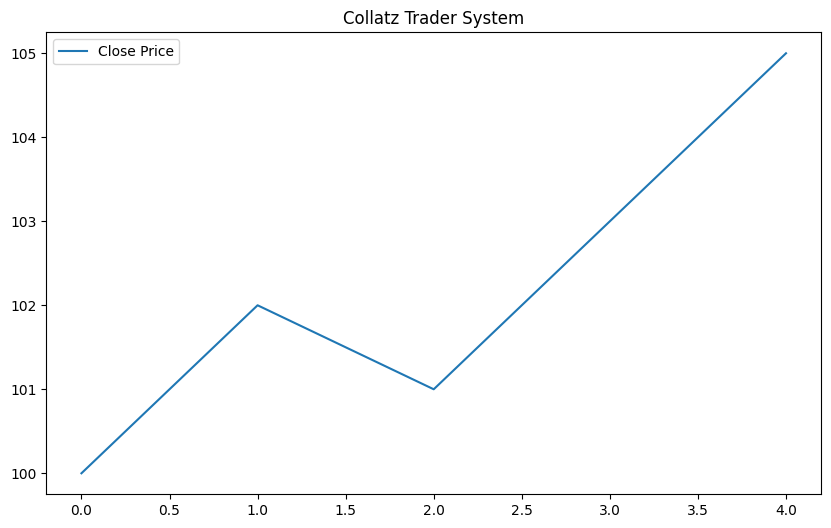

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Parameters
start_price = 100
volatility_threshold = 5
ma_length = 1
lookback_period = 1

# Sample data (replace this with your actual price data)
data = {
    'high': [105, 107, 106, 108, 110],
    'low': [95, 96, 97, 98, 99],
    'close': [100, 102, 101, 103, 105],
    'volume': [1000, 1200, 1100, 1300, 1400]
}
df = pd.DataFrame(data)

# Initialize variables
collatz_price_up = np.nan
collatz_price_down = np.nan

# Collatz Trader System Logic
for i in range(len(df)):
    if i == 0:
        collatz_price_up = df['volume'][i] * (df['close'][i] - df['low'][i]) / (df['high'][i] - df['low'][i]) if df['high'][i] != df['low'][i] else 0
        collatz_price_down = df['volume'][i] * (df['high'][i] - df['close'][i]) / (df['high'][i] - df['low'][i]) if df['high'][i] != df['low'][i] else 0
    else:
        current_price = df['volume'][i]
        price_change_percentage = (current_price - collatz_price_up) / collatz_price_up * 100

        # Collatz calculation for upward movement
        if price_change_percentage > volatility_threshold:
            collatz_price_up = collatz_price_up * 3 + 1
        elif price_change_percentage < -volatility_threshold:
            collatz_price_up = collatz_price_up / 2

        # Collatz calculation for downward movement
        if price_change_percentage < 0:
            collatz_price_down = collatz_price_down / 2
        elif price_change_percentage > 0:
            collatz_price_down = collatz_price_down * 3 + 1

    # RSI calculation (simplified)
    rsi1 = 70  # Placeholder for actual RSI calculation
    rsi2 = 30  # Placeholder for actual RSI calculation

    # Signal generation
    long_signal1 = rsi1 > 70
    short_signal1 = rsi1 > 70

    all_signals = df['low'][i] if long_signal1 else df['high'][i] if short_signal1 else np.nan

    # Moving average calculation
    ma_all_signals = df['close'].rolling(window=ma_length).mean()[i]

    long_signal2 = df['close'][i] > ma_all_signals
    short_signal2 = df['close'][i] < ma_all_signals

    # Volatility-based signals
    volumecollatz = (rsi1 + rsi2) / 2
    highest_level = volumecollatz  # Simplified for demonstration
    lowest_level = volumecollatz   # Simplified for demonstration
    RS = highest_level - lowest_level
    signal_condition = RS < 1

    # Plotting logic (not implemented here, use matplotlib for visualization)
    # You can add plotting code here to visualize the signals and indicators.

# Example of plotting (optional)
plt.figure(figsize=(10, 6))
plt.plot(df['close'], label='Close Price')
plt.title('Collatz Trader System')
plt.legend()
plt.show()